<a href="https://www.kaggle.com/gurjinderkaur/o-reilly-chapter-2-walkthrough?scriptVersionId=85974614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


### Introduction
I have been learning about machine learning from quite a sometime now but has never been confident enough about my skills and knowledge. So, I decided to learn it from a practical perspective along-with having a reasonable intuition behind what's really going on. I came across this book by O'Reilly called [Hands-on machine learning with Scikit-Learn, Keras and Tensorflow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646/?tag=hyprod-20&linkCode=df0&hvadid=385599638286&hvpos=&hvnetw=g&hvrand=2497627214649937380&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9005550&hvtargid=pla-523968811896&psc=1&tag=&ref=&adgrpid=79288120515&hvpone=&hvptwo=&hvadid=385599638286&hvpos=&hvnetw=g&hvrand=2497627214649937380&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9005550&hvtargid=pla-523968811896). After going through its content, I really felt this is going to help me gain a hands-on experience of machine learning. The book really provides you the required theory behind the algorithms along with codes and explanations working on real datasets! You can literally follow along coding while reading the book. 
<br>
<br>
The book is divided into two parts basically - first part deals with supervised and unsupervised learning while the second part focuses on deep learning.

This notebook walks you through the content of Chapter-2 that deals with building an end-to-end machine learning project. I think it is a good idea to code along reading, grasping the concepts, googling anything that is not familiar, and taking notes in this notebook itself. I really find it helpful to learn machine learning this way when you are just starting out and don't know where to start! 

### Data Analysis


In [66]:
 housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [67]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Here each row represents a district.
- There are 10 attributes.
- Target attribute is median_house_value.
<br>


In [68]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

The info() method is useful to get a quick description of the data, such as total number of rows, dtypes of attributes, number of non-null values etc.

In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are 20640 instances in the dataset.
- total_bedrooms attribute has only 20433 non-null values, which means that 207 instances have a missing value for this attribute. We need to take care of these missing/null values before feeding the data to the machine learning algorithm.
- ocean_proximity is a categorical variable while all othere are numeric type. We can use value_counts() to get unique values/categories and their count for ocean_proximity attribute.

In [70]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary for numerical attributes.

In [71]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*Note*: The null values are ignored (for example, count of total_bedrooms is 20433 and not 20640).
<br><br>
Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances that have a given value range.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

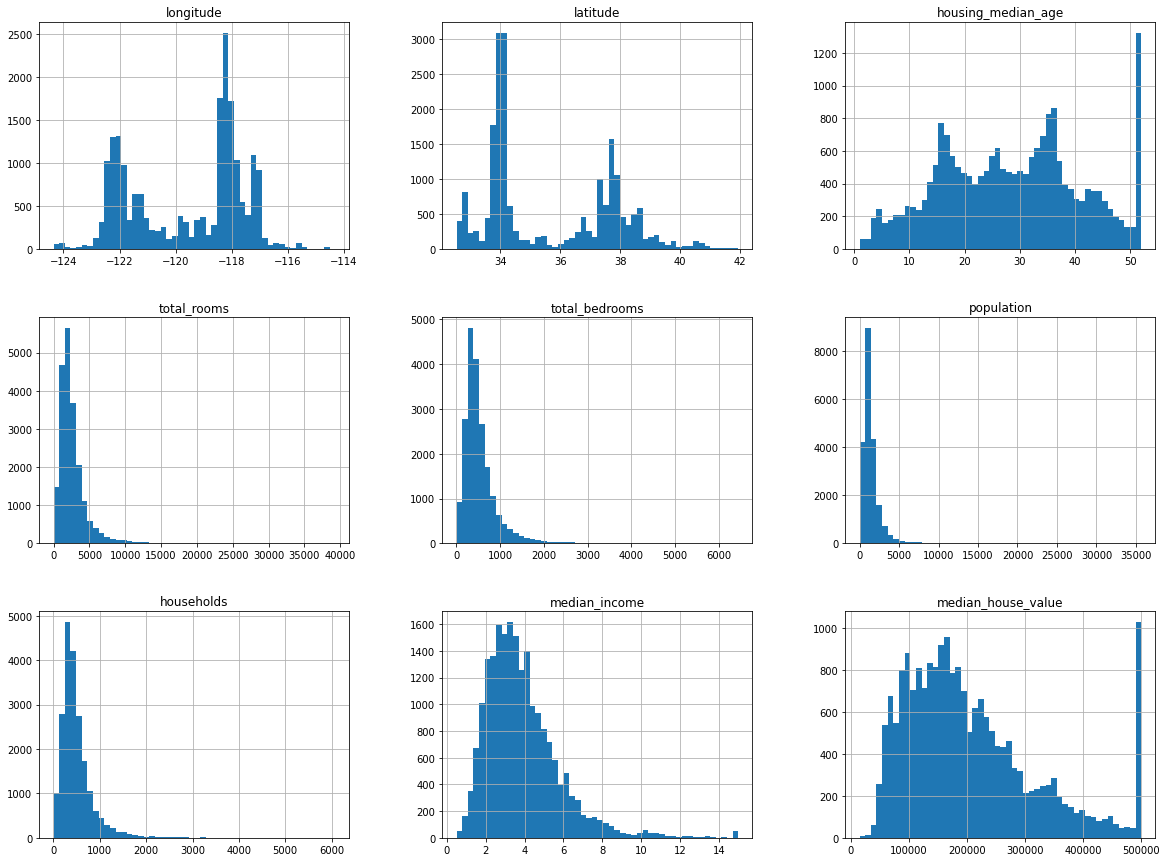

In [72]:
# We can call hist() method on the entire dataframe
# it uses pandas' hist() method to plot the histogram of each numerical attribute in the df
housing.hist(figsize=(20,15), bins=50)

Few things to notice from these histograms:
- The median income attribute does not look like it's expressed in USD. The data has been scaled and capped at 15 (actualy 15.0001 when you check max value in housing.describe()) for higher median incomes, and at 0.4999 for lower median incomes. The numbers represent roughly tens of thousands of dollars e.g. 3 actually means about $30,000.
- The housing median age and the median house value were also capped. We need to pay special attention to median_house_value as it is our target variable and we don't want our machine learning models to produce outputs beyond the specific range.
- All the attributes have very different scales. We will need to do feature scaling.
- Many histograms are *tail heavy*, they extend much farther to the right of the median than to the left. We will try to transform these attributes later on to have more bell-shaped distributions.

### Create test set
#### Data snooping bias
Our brain is amazing at detecting patterns, highly prone to overfitting. If we look at the test set, we may find an interesting pattern that can influence our decision on the choice of learning algorithm. It usually doesn't lead to a generalized model and is prone to what we call data snooping bias.
<br>
#### Random train-test split
To prevent this bias, it is always a good idea to randomly split the data into training and test set and keep the test set aside, while doing observations, analyses and training on the train set.
<br>
To create the test set, pick some instances randomly, which is typically 20% of the dataset (or less if the dataset is too large which is not the case here).
<br><br>
Scikit-learn provides a handy way to split the data into train-test sets using train_test_split.

In [73]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #specifying random_state makes sure the same split is performed each time this function is called

#### Sampling bias and Stratified sampling
In the above case, we have considered purely random sampling methods which is generally fine if our dataset is large enough (relative to the number of attributes). But if it is not, we run the risk of introducing <u> Sampling bias </u>.
<br>
*Problem with purely random sampling* - skewed test set would result in biased predictions.
<br><br>
We can use *stratified sampling*: the population is divided into homogeneous subgroups called *strata*, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.
<br><br>
Assume that median_income is a very important attribute to predict the median housing prices. We then want to make sure that the test set is representative of various categories of incomes in the whole dataset, and is not just chosen randomly.
<br>
Since median_income is numerical, we will convert it into categorical attribute.

<AxesSubplot:>

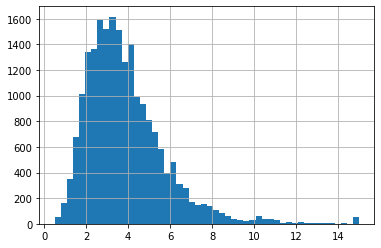

In [74]:
housing.median_income.hist(bins=50)

Most of the median incomes are clustered around 1.5 to 6. We can use pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5, category 2 from 1.5 to 3 and so on.
<br>
<br>
pandas.cut() - Use *cut* when you need to segment and sort data values into bins. It is useful for going from a continuous variable to a categorical variable. For example, ages to group of age ranges.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


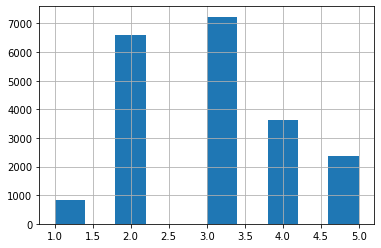

In [75]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])
housing['income_cat'].hist()
housing.head()

Now as the income has been converted into categories, we are ready to do stratified sampling based on the income category.
<br>
For this, we can use Scikit-learn's StratifiedShuffleSplit class.

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

We kept the test_size = 0.2, n_splits = 1 and random_state = 42. The split() method returns two numpy arrays, with the indices of train and test samples respectively.
We used a for loop to assign strat_train_set and strat_test_set as training and test dataset respectively by .loc[index] using the indices returned by split()

In [77]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [78]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

##### We can clearly see that all the categories of income_cat attribute have the SAME DISTRIBUTION in the test set as that in the original dataset.
For more information on stratified sampling, refer to https://medium.com/@arshaikh5775/stratified-sampling-62fcab68a052

##### Comparing stratified sampling with random sampling in terms of sampling bias:


In [79]:
# random train-test split of housing data containing income_cat attribute
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [80]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)
compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set)
}).sort_index()

compare_props['Random %error'] = 100 * compare_props['Random']/compare_props['Overall']-100
compare_props['Stratified %error'] = 100 * compare_props['Stratified']/compare_props['Overall']-100
compare_props

,Overall,Stratified,Random,Random %error,Stratified %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


We have compared the income_cat proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated with purely random sampling. As we can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

Now we can remove the income_cat attribute from housing so that the data is back in its original form.

In [81]:
# the income_cat attribute is dropped from the train and test datasets
# We are still keeping the stratified samples
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### More data exploration to gain insights
We can create a copy of the training set so that we can explore it without worrying about harming the original data.


In [82]:
housing = strat_train_set.copy()

#### Visualizing geographical data
As latitude and longitude represent geographical information, we can create a scatterplot of all districts to visualize the data.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

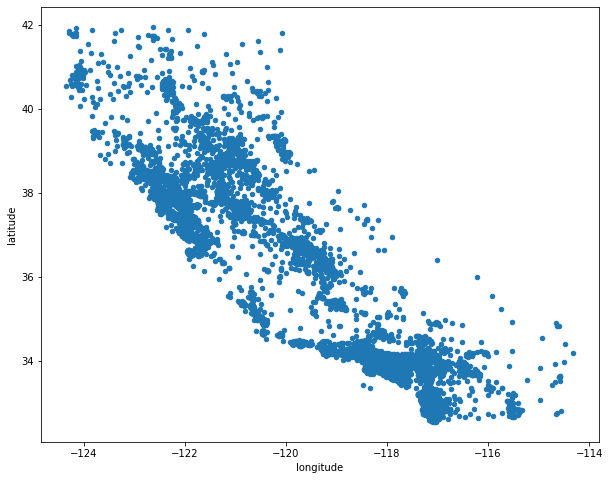

In [83]:
housing.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,8))

This looks like California, but other than that it is difficult to see any pattern. Setting the alpha=0.1 makes it much easier to visualize the places where there is a high density of data points.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

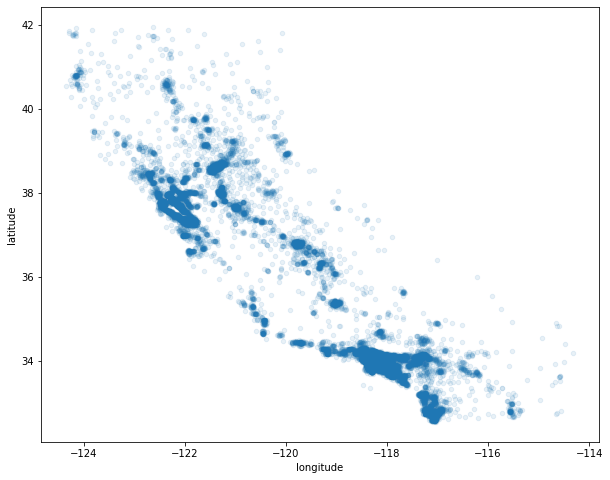

In [84]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(10,8))

We can further tweak the above plot to display more information as follows.
- The radius of each circle represents the district's population (option s).
- The color represents the price (option c).
- We are using a predefined colormap 'jet' which ranges from blue (small values) to red (large values)

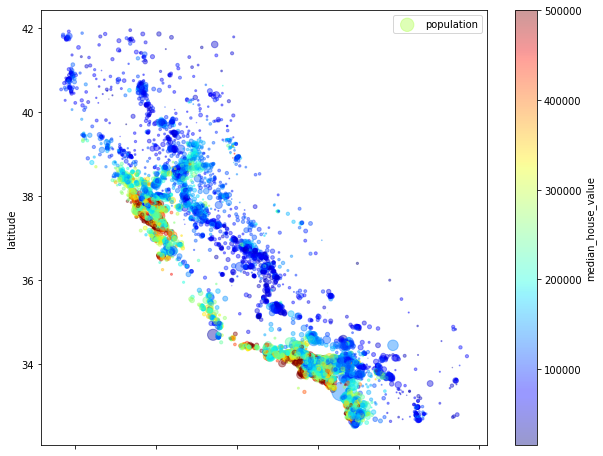

In [85]:
import matplotlib.pyplot as plt
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100, label='population',figsize=(10,8),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

The above plot tells us that the housing prices are very much related to the location (e.g. close to the ocean) and to the population density.

#### Looking for correlations
We can compute the correlation coefficient (pearson's r) between every pair of attributes using corr() function.
<br><br>
#### Pandas.df.corr() method
DataFrame.corr(method='pearson', min_periods=1) <br>
Compute pairwise correlation of columns, excluding NA/null values.

In [86]:
corr_matrix = housing.corr()
corr_matrix # corr() returns a dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


We can look at the correlation of our target variable median_house_value with every other attribute as follows.

In [87]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Some important points about pearson correlation coefficient:
- The correlation coefficient ranges from -1 (strong negative correlation) to 1 (strong positive correlation).
- When correlation = 0, it means there is no linear correlation between the attributes.
- It only captures linear correlation and may completely miss out on non-linear relationships.

#### Pandas' scatter_matrix method
It is another way to check for correlation between each pair of numeric attributes by plotting them against each other.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

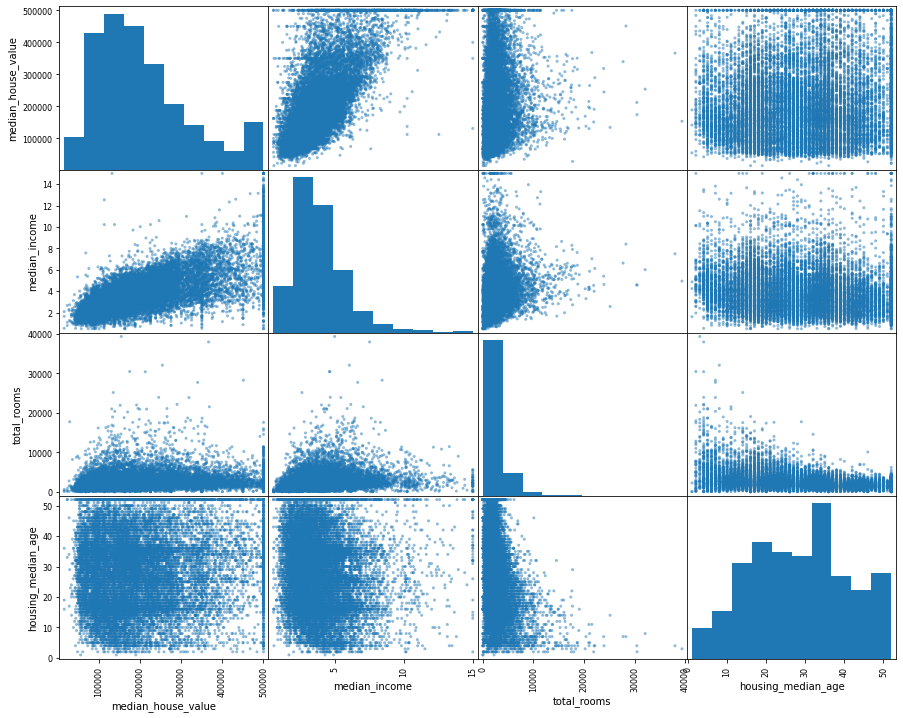

In [88]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age'] # choosing some important attributes to reduce number of plots in figure
scatter_matrix(housing[attributes],figsize=(15,12))

The most promising attribute to predict the median house value is the median income as they have the highest correlation, so we can focus on their correlation.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

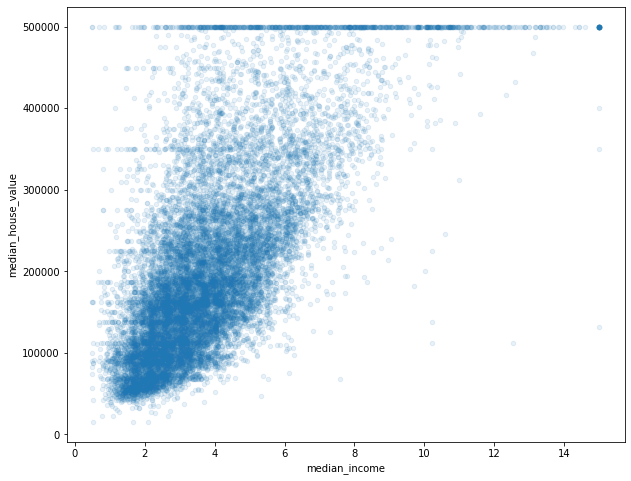

In [89]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1, figsize=(10,8))

From this plot, we see that:
- The correlation is very strong, we can clearly see an upward trend.
- The price cap is clearly visible as a horizontal line at \\$500,000. Also reveals some other less obvious straight lines around \\$450,000, another around \\$350,000, perhaps one around \\$280,000. We may need to remove the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

#### Where have we come so far:
- We identified a few data quirks that need to be cleaned before model training.
- We found some interesting correlations between the attributes.
- We also noticed that some attributes have tail-heavy distributions, so we will need to transform them.

#### What can still be done before training?
- We can try out different attribute combinations. 
- For example, total_rooms or total_bedrooms in a district is not very useful if we don't know how many households are there. What we really need is number of rooms per household.
- We can also make population per household as another interesting attribute.

In [90]:
# let us create some new attributes that will make much more sense
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

Look at the correlation matrix again:

In [91]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- The new bedrooms_per_room attribute is much more correlated with the median house value than the toal number of rooms or bedrooms. 
- The number of rooms per household is also more informative than the total number of rooms in a district - obviously larger houses are more expensive.

### Data Preparation
Copy the strat_train_set and separate the predictors and labels. We don't want to apply the same transformations to the predictors and target variable.

In [92]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Data cleaning
We noticed earlier that total_bedrooms column has missing values, so let's fix this. We can either drop the rows with missing values or fill them with some values (such as mean, median, zero).
<br>
We can set the missing values to median value. For that we need to compute the median value on the training set, use it to fill the missing values in the training set, and save the median value to use it later to replace missing values in the test set or new data.
<br><br>
We can use Scikit-Learn's SimpleImputer class to handle missing values.

In [93]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the ocean_proximity attribute.

In [94]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


Now we can fit the imputer instance to the training data using the fit() method:

In [95]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer computes the median of each attribute and store the results in its stastics_ instance variable.

In [96]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [97]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

This trained imputer can be used to transform the training set by replacing the missing values by the learned medians.

In [98]:
X = imputer.transform(housing_num) # returns a plain numpy array containing the transformed features
housing_tr = pd.DataFrame(X, columns = housing_num.columns) # put it back in a dataframe
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


Most machine learning algorithms prefer to work with numbers, so we can convert these categories from text to numbers. For this we can use Scikit-learn's OrdinalEncoder class.

In [99]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)
# housing.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


#### Ordinal encoding 
Not for our categorical variable though! We discuss it in just a minute.

In [100]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

We can get the list of categories using the categories_ instance variable which is a list of categories for each categorical attribute (in our case just for ocean_proximity).

In [101]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### One-hot encoding
*Important*:
Ordinal encoding assumes sequential ranking among the different categories and it makes more sense if our attribute has values like 'bad', 'average', 'good', 'excellent'. But it is not the case for ocean_proximity.
<br><br>
In such cases, a common way is to create a binary attribute per category. This is called one-hot encoding because only one attribute will be equal to 1 (hot) and the others will be 0 (cold).
<br>
The new variables are called dummy attributes.

In [102]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #scipy matrix and not numpy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [103]:
# we can call toarray() method if we want in a dense array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [104]:
# we can get the list of categories using the encoder's categories_ instance variable
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has a large number of cateogires, then one-hot encoding will result in a large number of input features that may slow down training and badly affect the performance. In such cases, it is often useful to replace the categorical features with some numeric attributes related to the categories.

#### Custom Tranformers
Though Scikit-learn provides us many useful transformers, sometimes we may need to create our own to do some specific task. We want our transformers to work seamlessly with Scikit-learn functionalities such as pipelines (which will be discussed shortly - just a way to apply transformations in given sequence). 
<br><br>
Since Scikit-learn relies on duck typing (don't know what it is? it is just a concept used in dynamically typed language such as python), all we need is to create a class for transformation that we want to do, and implement three methods: fit() - returning self, transform(), and fit_transform(). We can get the last one using TransformerMixin as a base class.
<br>
If we add BaseEstimator as a base class, we will get two extra methods get_params() and set_params() that can be used for automatic hyperparameter tuning.
<br><br>
As an example, we have created a transformer class below to add combined attributes as discussed earlier.

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # these are just the indices of required columns

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

The transformer has one hyperparameter, add_bedrooms_per_room, set to True by default. This hyperparameter will allow us to easily find out whether adding this attribute helps the ML algorithm or not. We can add as many hyperparameters as we want when we aren't sure about a good combination of their values.

#### Feature scaling
There are two ways to scale the attributes: min-max scaling (normalization) and standardization.
- Min-max scaling: values are shifted and rescaled such that they happen to be in the range of 0 and 1. It is done by subtracting min value and dividing by max minus min value.
- Standardization: first it subtracts the mean, and then divides by the standard deviation, resulting distribution has zero mean and unit variance. It does not bound the values to a specific range, that might be a problem for some algorithms like neural networks that expect the input ranging from 0 to 1. However, standardization is much less affected by outliers.
<br>
Scikit-learn provides us with MinMaxScaler and StandardScaler.

##### Note: It is important to fit the scalers to training data only, not to the full dataset or test dataset. Only then you can use them to transform the training set and test set or new data.

#### Transformation Pipelines
The various transformations need to be executed in right order. Scikit-learn provides the Pipeline class to help with such sequences of transformations.

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# the names of transformers 'imputer', 'attribs_adder', 'std_scaler' are user-defined
# Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

##### All but the last estimator must be transformers. Meaning that the last one may or may not be a transformer, but all others must be transformers.
When fit() method is called on the pipeline, it calls fit_transform sequentially on all transformers, passing output of each call as the parameter to the next call, until it reaches the final estimator for which it only calls fit() method.

#### Handling numeric and categorical attributes together
It is more convenient if we can have a single transformer that can handle all columns, applying appropriate transformations to each column. Scikit-Learn has introduced the columnTransformer for this purpose.

In [107]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
print(housing_prepared)

(16512, 16)
[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]


Here is what we have done:
- imported the ColumnTransformer class
- get the list of numerical column names and the list of categorical column name
- then we construct the ColumnTransformer whose constructor takes a list of tuples: where each tuple contains a name, a transformer (that can be another pipeline), and a list of names (or indices) of columns that the transformer should be applied to.
- finally apply the ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis ( the transformers should return the same number of rows).

### Select and train a model
We can start building our model on the training set and evaluating it on the training set itself. Let's first train a Linear Regression model.

In [108]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Evaluate the performance of the LinearRegression model on the training set. We are using Mean squared error from Scikit-Learn's metrics module and then use sqrt() to calculate root mean squared error.

In [109]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

A prediction error of \\$68,628 is not very great. It is an example of model underfitting.
<br>
In case of underfitting we can try the following:
- Try a more powerful model.
- Feed the model with better features.
- reduce the constraints on the model (if the model is regularized).

We can try a more complex model such as DecisionTree and let's see how it performs.

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [111]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error at all! It is much likely that the decision tree has badly overfit the data. How can we be so sure without trying the model on new data?
We don't want to touch our test set until we are confident of our model's performance on the training set. So we need to use a part of the training set for training, and part for model validation.

#### Cross-Validation for better evaluation
We have two options:
- split the training set using train_test_split into training and validation sets.
- use Scikit-Learn's K-fold cross-validation feature. It randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation each time and using other K-1 folds for training. The result is an array containing K evaluation scores.

In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

##### Note: Sklearn's cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so scoring function is actually the opposite of the MSE (i.e. negative value), which is why our code computes -scores before calculating the rmse.

Display the results:

In [113]:
def display_scores(scores):
    print('Scores:',scores)
    print('\nMean:', scores.mean())
    print("\nStandard Deviation", scores.std())

display_scores(tree_rmse_scores)

Scores: [68474.0176403  67518.45806222 71717.12043899 68241.59948461
 71510.80961381 75493.81735078 70813.7907084  71197.21361778
 74681.37032871 69595.24168774]

Mean: 70924.34389333401

Standard Deviation 2502.4435893077634


While looking at the mean error, we notice that decision tree performs even worse than linear regression model. The decision tree has a score of approx 71084, generally with std of 2621.
We can compute the same scores for linear regression just to be sure.

In [114]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

Mean: 69052.46136345083

Standard Deviation 2731.6740017983457


So we were right! Decision tree seems to be overfitting so badly that it performs worse than linear regression.
<br>
We can try RandomForestRegressor and see how it performs.

In [115]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [116]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49419.96158165 47497.66942595 50078.32557125 52166.19942166
 49728.46471008 53128.78786808 49248.51042054 47940.76413307
 52792.17444456 50439.7172786 ]

Mean: 50244.05748554248

Standard Deviation 1826.440265390118


Random forest has performed better than linear regression and decision tree. However, the score on the training set is still lower than that on the validation sets, meaning that the model is still overfitting the training set.

Several approaches can be tried to handle overfitting, however before doing that, it is often a good idea to try some other models. The goal should be to shortlist a few promising models.

### Fine-tuning the hyperparameters
After shortlisting the promising models, we need to fine-tune them, that involves making small adjustments such as changing values of hyperparameters to improve the performance of the models.
<br>
One conventional approach is to manually keep changing the hyperparameters until we find a great combination of hyperparameter values. This is a very tedious task though.

#### Grid Search
We can use Sklearn's GridSearchCV to do the search for us. We can pass the hyperparameters we want to experiment with and the values we want to try, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [117]:
from sklearn.model_selection import GridSearchCV

# two dictionaries are passed in the param_grid
# dict1 = 3*4 = 12 combinations tried out
# dict2 = 1*2*3 = 6 combinations tried out
# In total 12+6 = 18 combinations tried out
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]


forest_reg = RandomForestRegressor()

# cv = 5 means 5-fold cross validation
# 18 hyperparameter combinations for each fold => 18*5 = 90 total rounds of training!
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [118]:
grid_search.best_params_ # returns the best hyperparameter values

{'max_features': 8, 'n_estimators': 30}

In [119]:
grid_search.best_estimator_ # returns the best estimator directly

RandomForestRegressor(max_features=8, n_estimators=30)

In [120]:
# we can also print the evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64235.63075140957 {'max_features': 2, 'n_estimators': 3}
55627.729767588644 {'max_features': 2, 'n_estimators': 10}
52911.23021457051 {'max_features': 2, 'n_estimators': 30}
60401.096713425526 {'max_features': 4, 'n_estimators': 3}
52870.45053104873 {'max_features': 4, 'n_estimators': 10}
50291.02767857572 {'max_features': 4, 'n_estimators': 30}
58622.473776117644 {'max_features': 6, 'n_estimators': 3}
52067.280197467044 {'max_features': 6, 'n_estimators': 10}
50222.81776918827 {'max_features': 6, 'n_estimators': 30}
58599.94637608524 {'max_features': 8, 'n_estimators': 3}
51977.943493920146 {'max_features': 8, 'n_estimators': 10}
49926.424371121306 {'max_features': 8, 'n_estimators': 30}
61943.305464608995 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54577.34564539189 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60512.03574741851 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52434.07298034168 {'bootstrap': False, 'max_features': 3, 'n_estimato

#### Randomized Search
Grid search is preferred when the number of combinations of hyperparameters to be tried out is generally small. But if the hyperparameter search space is large, it is often a good idea to use RandomizedSearchCV instead.
- It tries a random value for each hyperparameter at every iteration. For example, if you set the number of iterations to 1000, this approach explores 1000 different values for each hyperparameter.
- We have more control over the computing budget as we can adjust the number of iterations.

#### Ensemble methods
Another way to fine-tune our system is to try to combine the models that perform the best. The group of models is called 'ensemble' that usually performs better than the best individual models.

### Analysing the best models and their errors
After shortlisting the best models, we can inspect them further to get more information, such as the importance of features in making predictions.
<br>
As RandomForestRegressor has given the best performance, we can use its best estimator returned by the grid search to look for feature importance as shown below.

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
# returns an array representing the importance of each attribute in the training set 

array([7.27604555e-02, 6.01635103e-02, 4.19044751e-02, 1.46320583e-02,
       1.47579985e-02, 1.55854654e-02, 1.44371261e-02, 3.37583517e-01,
       5.50745790e-02, 1.12839887e-01, 8.36411352e-02, 6.68952224e-03,
       1.64934101e-01, 8.97184101e-05, 1.79979378e-03, 3.10665752e-03])

To get the corresponding feature name next to its importance value, we can do the following.

In [122]:
# we are trying to get a list of all the attribute names - orginal + extra added by us + dummy attributes after one hot encoding
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room'] # a list of names for additional attributes that we added previously
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
print((attributes))
sorted(zip(feature_importances, attributes), reverse = True) # lists the attributes in decreasing order of feature_importances

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


[(0.33758351699717465, 'median_income'),
 (0.16493410051064605, 'INLAND'),
 (0.11283988702431787, 'pop_per_hhold'),
 (0.08364113516526246, 'bedrooms_per_room'),
 (0.07276045549233584, 'longitude'),
 (0.06016351030867121, 'latitude'),
 (0.05507457901582166, 'rooms_per_hhold'),
 (0.041904475135009674, 'housing_median_age'),
 (0.015585465445905184, 'population'),
 (0.0147579985041567, 'total_bedrooms'),
 (0.014632058315393813, 'total_rooms'),
 (0.014437126124067723, 'households'),
 (0.006689522243256302, '<1H OCEAN'),
 (0.0031066575242045882, 'NEAR OCEAN'),
 (0.0017997937836509144, 'NEAR BAY'),
 (8.971841012528113e-05, 'ISLAND')]

### Evaluation on the test set
Now we can evaluate how our model performs on the test set. What we need to do is:
- get the predictors and labels from our test set
- apply the full_pipeline to transform the test data (call transform() and not fit_transform()!)
- predict the values of target attribute
- measure the performance


In [123]:
final_model = grid_search.best_estimator_

# separate out the predictors and labels
X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()

# apply the transformations
X_test_prepared = full_pipeline.transform(X_test)

# make predictions
final_predictions = final_model.predict(X_test_prepared)

# evaluate
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47767.260415944984